In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix
from sklearn.svm import SVC

# PREPROCESSING 

In [2]:
#Read data
df = pd.read_csv("NC_policing.csv")
df.info()
df.head()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402087 entries, 0 to 402086
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   state               402087 non-null  object 
 1   stop_date           402087 non-null  object 
 2   driver_gender       402087 non-null  object 
 3   driver_age          401996 non-null  float64
 4   driver_race_raw     402087 non-null  object 
 5   driver_race         402087 non-null  object 
 6   violation           402087 non-null  object 
 7   search_type         402087 non-null  object 
 8   contraband_found    402087 non-null  bool   
 9   stop_outcome        402087 non-null  object 
 10  search_basis        402087 non-null  object 
 11  officer_id          402087 non-null  int64  
 12  drugs_related_stop  4379 non-null    object 
 13  district            402049 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(11)
memory usage: 40.3+ MB


state                      0
stop_date                  0
driver_gender              0
driver_age                91
driver_race_raw            0
driver_race                0
violation                  0
search_type                0
contraband_found           0
stop_outcome               0
search_basis               0
officer_id                 0
drugs_related_stop    397708
district                  38
dtype: int64

In [3]:
2, 3, 5, 6 ,7 ,(9),11,


(2, 3, 5, 6, 7, 9, 11)

In [4]:
#Check the unique values of all data.
for col in df:
    print(df[col].unique())
    
df.head(30)

['NC']
['2000-07-31' '2000-08-01' '2000-08-02' ... '2015-12-29' '2015-12-30'
 '2015-12-31']
['M' 'F']
[23. 29. 49. 24. 21. 33. 16. 28. 39. 68. 20. 40. 50. 57. 38. 46. 34. 44.
 22. 36. 53. 32. 15. 27. 26. 41. 48. 25. 47. 42. 52. 17. 76. 61. 31. 30.
 64. 37. 19. 51. 18. 35. 59. 73. 43. 45. 66. 65. 54. 58. 55. 75. 63. 56.
 60. 81. 62. 77. 67. 69. 87. 70. 71. 78. 74. 85. 72. 79. 93. 80. 89. nan
 82. 84. 91. 83. 90. 88. 86. 92. 98. 99. 94. 96.]
['W N' 'B N' 'U H' 'W H' 'I N' 'U N' 'A N' 'A H' 'B H' 'I H']
['White' 'Black' 'Hispanic' 'Other' 'Asian']
['Speeding' 'DUI' 'Equipment' 'Seat belt' 'Other' 'Registration/plates'
 'Safe movement' 'Stop sign/light']
['No Search Conducted' 'Protective Frisk' 'Incident to Arrest' 'Consent'
 'Probable Cause' 'Warrant']
[False  True]
['Arrest' 'No Action']
['No Search Conducted' 'Observation Suspected Contraband'
 'Erratic Suspicious Behaviour' 'Other Official Info'
 'Suspicious Movement' 'Witness Observation' 'Informant Tip'
 'Observation Suspected Contr

,state,stop_date,driver_gender,driver_age,driver_race_raw,driver_race,violation,search_type,contraband_found,stop_outcome,search_basis,officer_id,drugs_related_stop,district
0,NC,2000-07-31,M,23.0,W N,White,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,NaN,E3
1,NC,2000-07-31,F,29.0,W N,White,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,NaN,E3
2,NC,2000-07-31,F,49.0,B N,Black,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,NaN,E3
3,NC,2000-07-31,M,29.0,B N,Black,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,NaN,E3
4,NC,2000-07-31,M,24.0,U H,Hispanic,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,NaN,E3
5,NC,2000-07-31,M,21.0,B N,Black,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,NaN,E3
6,NC,2000-07-31,M,33.0,B N,Black,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,NaN,E3
7,NC,2000-07-31,M,16.0,W N,White,Speeding,No Search Conducted,False,Arrest,No Search Conducted,10606,NaN,E3
8,NC,2000-08-01,M,28.0,B N,Black,Speeding,Protective Frisk,False,Arrest,Observation Suspected Contraband,10241,NaN,E2
9,NC,2000-08-01,F,39.0,B N,Black,DUI,No Search Conducted,False,Arrest,No Search Conducted,10233,NaN,C6


In [5]:
count = df[(df['search_type'] == 'Protective Frisk') & (df['stop_outcome'] == 'No Action')].shape[0]
print(count)


13


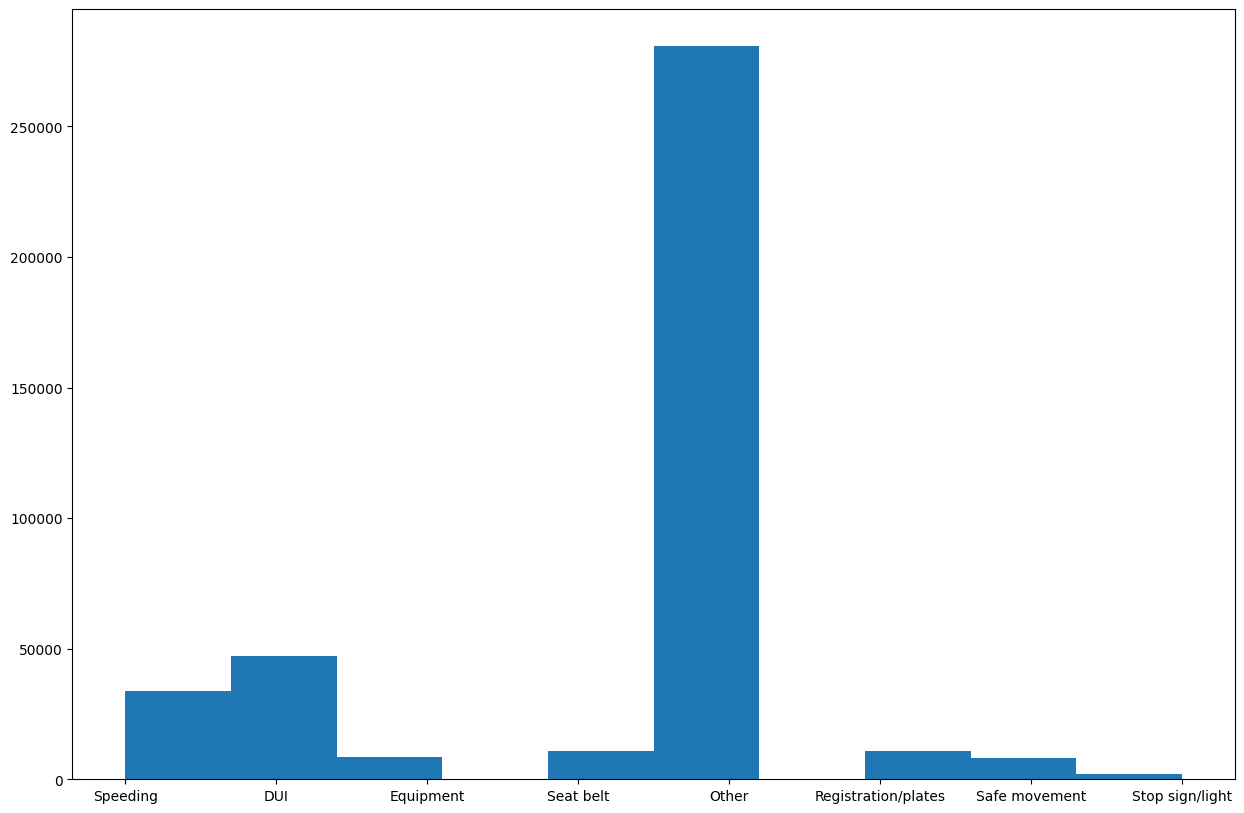

In [6]:
plt.figure(figsize=(15,10))
plt.hist(df['violation'])
plt.show()

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# 가정: df는 이미 생성된 pandas DataFrame

# stop_outcome이 'Arrest'인 행만 필터링
arrest_df = df[df['stop_outcome'] == 'No Action']

# violation 별 Arrest 횟수 계산
arrest_counts = arrest_df['violation'].value_counts()

# 산점도 그리기
plt.scatter(df, color='blue', alpha=0.6)

plt.xticks(rotation=45)  # x축 레이블을 회전시켜 보기 쉽게 만듭니다.
plt.tight_layout()       # 레이블이 그래프 영역과 겹치지 않도록 조정합니다.
plt.show()


TypeError: scatter() missing 1 required positional argument: 'y'

<function matplotlib.pyplot.xticks(ticks=None, labels=None, *, minor=False, **kwargs)>

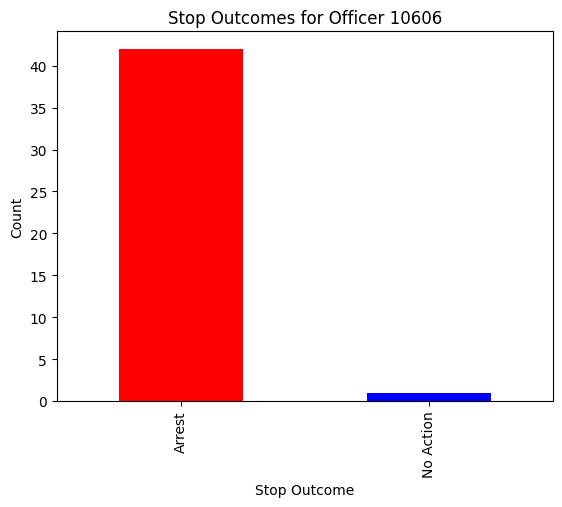

In [10]:
import matplotlib.pyplot as plt

# officer_id가 10606인 데이터 필터링
officer_data = df[df['officer_id'] == 10606]

# stop_outcome에서 'Arrest'와 'No Action'에 해당하는 데이터만 선택
filtered_data = officer_data[officer_data['stop_outcome'].isin(['Arrest', 'No Action'])]

# 각 stop_outcome의 빈도 계산
outcome_counts = filtered_data['stop_outcome'].value_counts()

# 막대 그래프 그리기
outcome_counts.plot(kind='bar', color=['red', 'blue'])
plt.title('Stop Outcomes for Officer 10606')
plt.xlabel('Stop Outcome')
plt.ylabel('Count')
plt.xticks



In [11]:
print((df['search_type'] == 'Other').unique())


[False]


In [12]:
count = df[(df['search_type'] == 'No Search Conducted') & (df['stop_outcome'] == 'Arrest')].shape[0]
print(count)


68355


In [13]:
count = df[(df['violation'] == 'DUI') & (df['stop_outcome'] == 'No Action')].shape[0]
print(count)


1417


In [14]:
total_rows = len(df)
no_action_rows = len(df[df['search_type'] == 'Seat belt']& df[df['stop_outcome']== 'No Action'])
no_action_ratio = (no_action_rows / total_rows) *100

print(no_action_ratio)

69.2071616341737


## Missing Values

In [15]:
#Fill missing values in 'drivers_age' with mean
mean_age = df['driver_age'].mean()
print("Average age is :", mean_age)

Average age is : 41.878103264709104


In [16]:
#All missing values in 'driver_age' fills with average mean
#It was rounded at 소수첫째자리 반올림
df['driver_age'] = df['driver_age'].fillna(int(np.rint(mean_age)))

#Fill missing values in 'drugs_related_stop' feature with false values
#because 차 수색해서 차에서 마약이 나올 확률이 안나올 확률보다 낮다
df['drugs_related_stop'] = df['drugs_related_stop'].fillna(False)

# only 38 data missed, = keinen Einfluss auf dataset
df.dropna(axis=0, inplace=True)

#Check ob tere are antother missing values
df.isna().sum()

state                 0
stop_date             0
driver_gender         0
driver_age            0
driver_race_raw       0
driver_race           0
violation             0
search_type           0
contraband_found      0
stop_outcome          0
search_basis          0
officer_id            0
drugs_related_stop    0
district              0
dtype: int64

## Encoding

we cannot work with object Dtype. So we need to change the Dtype as numeric values.


In [20]:
#Copy dataset to make a encoded data.
df_encoded = df.copy()

#Remove unnecessary columns 사용되지 않을 컬럼, y variable 삭제
df_encoded = df_encoded.drop('state', axis=1)
#df_encoded = df_encoded.drop('stop_outcome', axis=1) # y variable
df_encoded = df_encoded.drop('driver_race_raw', axis=1) # 'driver_race'랑 비슷한 데이터셋

# Label encoding for binary columns 
encoder = LabelEncoder()
for col in ['contraband_found','driver_gender', 'drugs_related_stop','stop_outcome']:
    df_encoded.loc[:,col] = encoder.fit_transform(df_encoded.loc[:,col])

# Label encoding for officer_id 
encoder = LabelEncoder()
df_encoded.loc[:,'officer_id'] = encoder.fit_transform(df_encoded.loc[:,'officer_id'])

/var/folders/8y/gcrnzpp17kj_68w30t1fyf1r0000gn/T/ipykernel_20632/2612005333.py:12: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_encoded.loc[:,col] = encoder.fit_transform(df_encoded.loc[:,col])


In [21]:
#Classify the reason of search 
search_reasons = search_reasons = [
    'No Search Conducted', 'Observation Suspected Contraband', 
    'Erratic Suspicious Behaviour', 'Other Official Info', 
    'Suspicious Movement', 'Witness Observation', 'Informant Tip'
]
# Initialize binary columns for each reason in df_encoded with default value 0
for reason in search_reasons:
    df_encoded[f'search_basis_{reason}'] = 0

# Update these columns in df_encoded based on the 'search_basis' column
for reason in search_reasons:
    df_encoded.loc[df_encoded['search_basis'].str.contains(reason), f'search_basis_{reason}'] = 1

# Drop the original 'search_basis' column from df_encoded
df_encoded = df_encoded.drop('search_basis', axis=1)

df_encoded.head(30).T

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
stop_date,2000-07-31,2000-07-31,2000-07-31,2000-07-31,2000-07-31,2000-07-31,2000-07-31,2000-07-31,2000-08-01,2000-08-01,...,2000-08-01,2000-08-01,2000-08-01,2000-08-01,2000-08-01,2000-08-01,2000-08-01,2000-08-01,2000-08-01,2000-08-01
driver_gender,1,0,0,1,1,1,1,1,1,0,...,0,1,1,1,1,1,1,1,1,0
driver_age,23.0,29.0,49.0,29.0,24.0,21.0,33.0,16.0,28.0,39.0,...,38.0,50.0,46.0,21.0,34.0,21.0,44.0,22.0,40.0,40.0
driver_race,White,White,Black,Black,Hispanic,Black,Black,White,Black,Black,...,White,Hispanic,Black,Black,White,Black,White,White,Hispanic,White
violation,Speeding,Speeding,Speeding,Speeding,Speeding,Speeding,Speeding,Speeding,Speeding,DUI,...,Other,Other,Speeding,Seat belt,Other,Speeding,Speeding,Speeding,Seat belt,Equipment
search_type,No Search Conducted,No Search Conducted,No Search Conducted,No Search Conducted,No Search Conducted,No Search Conducted,No Search Conducted,No Search Conducted,Protective Frisk,No Search Conducted,...,No Search Conducted,No Search Conducted,No Search Conducted,Incident to Arrest,No Search Conducted,No Search Conducted,No Search Conducted,No Search Conducted,No Search Conducted,No Search Conducted
contraband_found,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
stop_outcome,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,0
officer_id,722,722,722,722,722,722,722,722,416,409,...,352,403,759,1111,709,1205,1205,1205,1205,1205
drugs_related_stop,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Classify district
dist = ['A', 'B','C','D','E','F']

for district in dist:
    df_encoded[f'district_{district}'] = 0

for district in dist:
    df_encoded.loc[df_encoded['district'].str.contains(district), f'district_{district}'] = 1

df_encoded = df_encoded.drop('district', axis=1)

In [ ]:
# Convert 'stop_date' to datetime format
df_encoded['stop_date'] = pd.to_datetime(df_encoded['stop_date'])

# Extract year, month, day, and day of the week
df_encoded['year'] = df_encoded['stop_date'].dt.year
df_encoded['month'] = df_encoded['stop_date'].dt.month # 계절로 분류 +
df_encoded['day'] = df_encoded['stop_date'].dt.day 
df_encoded['day_of_week'] = df_encoded['stop_date'].dt.dayofweek  # Monday=0, Sunday=6

# Drop the original 'stop_date' column 
df_encoded = df_encoded.drop('stop_date', axis=1)

In [ ]:
# One-hot encoding
# List of columns to be one-hot encoded
columns_to_encode = ['search_type', 'driver_race', 'violation']  # Add more columns as needed

for col in columns_to_encode:
    if col in df_encoded.columns:
        # Generate one-hot encoded columns
        dummies = pd.get_dummies(df_encoded[col], prefix=col)
        
        # Concatenate the one-hot encoded columns to df_encoded
        df_encoded = pd.concat([df_encoded, dummies], axis=1)
        
        # Drop the original column
        df_encoded = df_encoded.drop(col, axis=1)



In [ ]:
#각 컬럼이 어떤 type 인지 확인
#df.info()

#Check the unique values of all data.
for col in df_encoded:
    print(df_encoded[col].unique())

In [ ]:
df_encoded.head().T 

# Ensure 'search_basis' exists in df_encoded
if 'search_basis' in df_encoded.columns:
    
    # List of unique search basis reasons
    search_reasons = [
        'No Search Conducted', 'Observation Suspected Contraband', 
        'Erratic Suspicious Behaviour', 'Other Official Info', 
        'Suspicious Movement', 'Witness Observation', 'Informant Tip'
    ]

    # Initialize binary columns for each reason with default value 0
    for reason in search_reasons:
        df_encoded[f'search_basis_{reason}'] = 0

    # Update the binary columns based on the 'search_basis' column
    for reason in search_reasons:
        df_encoded.loc[df_encoded['search_basis'].str.contains(reason), f'search_basis_{reason}'] = 1

    # Drop the original 'search_basis' column
    df_encoded = df_encoded.drop('search_basis', axis=1)

df_encoded.head(100).T



In [ ]:
df_encoded.describe().T

### Generate two binary classifiers using two different methods of your liking and compare their performances against a dummy classifier, which always predicts “not arrested”.

In [ ]:
#target variable y to classify arrest, encoded
y = df_encoded["stop_outcome"]
y_encoded = encoder.fit_transform(y)


In [ ]:
# data split to training set & test sets
X = df_encoded.drop('stop_outcome', axis=1)

y = (df_encoded['stop_outcome'] == "Arrested").astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [ ]:
#for standard scaling later, we convert all data types to float32
X = X.astype(np.float32)

# Split the data into training and test set
# test_size=0.2: 60% training set, 20% test set, 20% CV
# random_state=350: fix the random set to get the same result every time you run the code (for tutorial purposes)
X_tmp, X_test, y_tmp, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=350)
X_train, X_val, y_train, y_val = train_test_split(X_tmp, y_tmp, test_size=0.25, random_state=350)

In [ ]:
print(X_train.shape)
print(X_test.shape)
#print(X_val.shape)

In [ ]:
# Standardizing features
scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

#X_train_norm = X_train.copy()
#X_train_norm.values[:] = scaler.fit_transform(X_train)
# Replacing the values in our X_test by the normalized ones
#X_test_norm = X_test.copy()
3X_test_norm.values[:] = scaler.transform(X_test)
# Replacing the values in our X_val by the normalized ones
#X_val_norm = X_test.copy()
#X_val_norm.values[:] = scaler.transform(X_val)

#X_train_norm

In [ ]:
#creating correlation matrix for feature selection
corr = X.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, linewidths=0.1, square=True, annot=True, cmap='YlGnBu',
            linecolor="white", fmt='.2f')
plt.title('Correlation between features')
plt.show()